### Decision Trees Example 1.2

We study the **heart** data set and construct a decision tree based on the 303 cases using only the predictors **maxHR** and **Age**. We use the **Python**-package **sklearn.tree** for the computation. The resulting partition and tree are shown below.


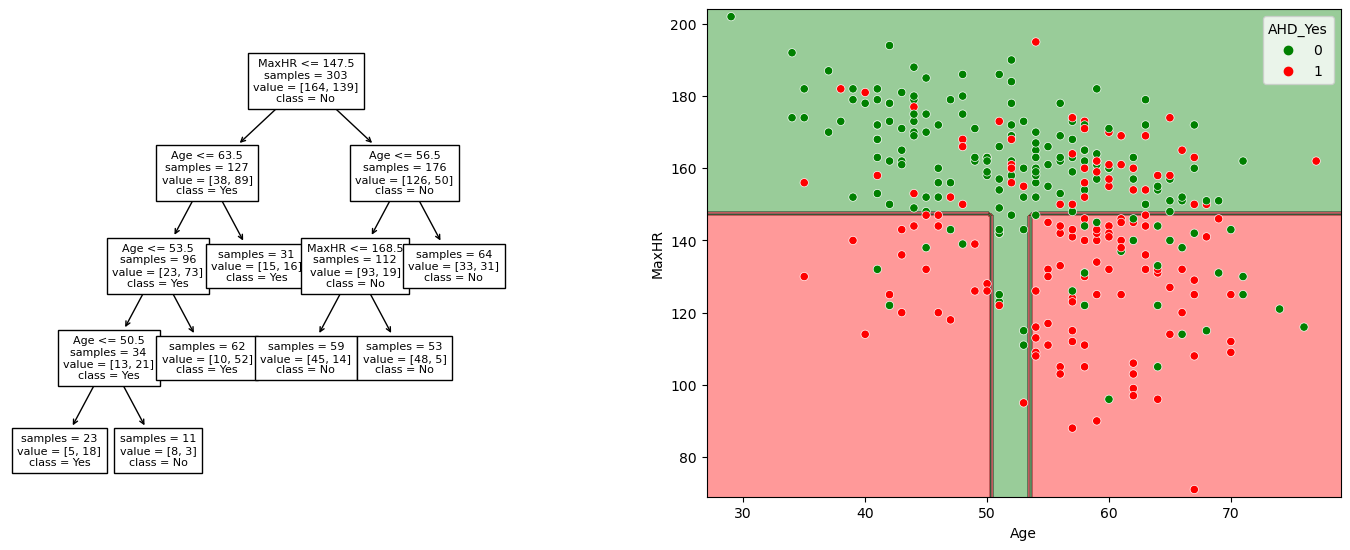

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

# Load data
df = pd.read_csv('./data/Heart.csv')

# Replace Categorical Variable with dummies
df = pd.get_dummies(data=df, columns=['AHD'], drop_first=True)

# Define x and y
y = df[['AHD_Yes']]
X = df[['Age', 'MaxHR']]

# Create and fit Decision tree classifier
clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                  min_samples_split=10, 
                                  min_samples_leaf=5, 
                                  min_impurity_decrease=0.01)
clf = clf.fit(X, y)

# Create grid
margin, n = 2, 100
xx = np.linspace(min(X['Age']) - margin, max(X['Age']) + margin, n)
yy = np.linspace(min(X['MaxHR']) - margin, max(X['MaxHR']) + margin, n)
yy, xx = np.meshgrid(yy, xx)

# Predict
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot Decision Tree
tree.plot_tree(clf, ax=ax[0], impurity=False, fontsize=8, 
               feature_names=X.columns.values, class_names=['No', 'Yes'])

# Plot surface
ax[1].contourf(xx, yy, Z,
               colors=['green', 'black', 'red', 'black'], alpha=0.4)
# Plot datapoints
sns.scatterplot(x=df['Age'], y=df['MaxHR'],  ax=ax[1],
                hue=df['AHD_Yes'], palette=['green', 'red'])

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)    
plt.show()

The figure shows the decision tree (left) and the corresponding partition of the predictor space (right). It can be seen, that each region contains mainly samples that either belong to **AHD=Yes** or **AHD=No**. As it can be seen in the right panel, there are at least ten observations in each terminal node.

The purity of the regions, however, differs. For example the region in the lower right corner is very pure, whereas the upper right region is quite heterogeneous. 